<a href="https://colab.research.google.com/github/JuniorAlfredoHuerta/PC1AIA/blob/main/AIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [364]:
import numpy as np
import random
import matplotlib.pyplot as plt
from time import time
import statistics
from random import randrange


Se divide en dos partes, ambas hacen uso del mismo JSSP pero modificado para que no haya errores, puede crear una lista de trabajos aleatorios con la funcion e randomsampling.

En las funciones finales unicamente agregue la cantidad de trabajos y el numero de maquinas.

### Randomsampling 1

In [365]:
#Generar una muestra aleatoria
def randomsampling(n,m):    
  jobs = np.zeros((n, m, 2), dtype=int)
  for i in range(n):
    l = testeo(m)
    jobs[i] = np.array(l).reshape(m, 2)
    np.random.shuffle(jobs[i])
  final = jobs
  return final



In [366]:
#Generar la lista de trabajos aleatoros
def testeo(m):
  a = np.zeros(m)
  c = np.zeros(m*2)
  t = 0
  p = 0
  for i in range(m):
    a[i] = i
  for i in range(m*2):
    x = random.randint(1,50)
    if((i%2) == 0):
      c[i] = a[t]
      t += 1
    else:
      c[i] = x
      p += 1 
  return c

In [367]:
#JSSP desarrollado en clase
def JSSPNORMAL(jobs,n,m):
  rep = [i for i in range(n)]*m
  random.shuffle(rep)
  mstart = np.zeros((m), dtype=int)
  jend = np.zeros((m), dtype=int)
  idxs = np.zeros((n), dtype=int)

  makespan = 0
  for e in rep:
      i = idxs[e]
      idxs[e] += 1
      midx = jobs[e, i, 0]
      time = jobs[e, i, 1]
      #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
      mstart[midx] = max(mstart[midx], jend[e]) + time
      jend[e] = mstart[midx]
      if mstart[midx] > makespan:
          makespan = mstart[midx]

  mstart = np.zeros((m), dtype=int)
  jend = np.zeros((m), dtype=int)
  idxs = np.zeros((n), dtype=int)
  schedule = np.zeros((m*10, makespan))

  for e in rep:
      i = idxs[e]
      idxs[e] += 1
      midx = jobs[e, i, 0]
      time = jobs[e, i, 1]
      mstart[midx] = max(mstart[midx], jend[e])
      schedule[midx*10:(midx+1)*10, mstart[midx]:mstart[midx] + time] = e+1
      mstart[midx] += time
      jend[e] = mstart[midx]

  return makespan,schedule

###180 ejecuciones

In [368]:
#Muestreo simple
def lesssampling(n,m,p):
  listmake = []
  schedule = []
  for i in range(180):
    makespan, schedule0 = JSSPNORMAL(p,n,m)
    listmake.append(makespan)
    if len(listmake) == 1:
      Z = listmake[0]
    if(Z >= makespan):
      Z = makespan
      schedule = schedule0
  charts(listmake)
  return makespan,schedule


In [369]:
#Testeo randomsampling
def Testeos(p0,n,m,t):
  listmake0 = []
  schedulea = []
  end = time() + t
  while time() < end:
    makespan0, schedule0 = JSSPNORMAL(p0,n,m)
    listmake0.append(makespan0)
    if len(listmake0) == 1:
      Z = listmake0[0]
    if(Z >= makespan0):
      Z = makespan0
      schedulea = schedule0  
  print("rs  ",end = " ")
  charts(listmake0)
  print("1rs ",end = " ")
  ML , SL = lesssampling(n,m,p0)
  return schedulea , SL , listmake0

  


In [370]:
#Devolver valores para la comparación
def charts(listmake):
  best = min(listmake)
  z = listmake.index(best)
  mean = sum(listmake)/len(listmake)
  md = statistics.median(listmake)
  sd = np.std(listmake)
  print(best,"  ", round(mean,2), " ",round(md,2),"",round(sd,2),"  de ",len(listmake), "iteraciones")


JSSP A ORDENAR

Puede modificar el horario que desea trabajar, hice uno corto para no tardar mucho

In [371]:
TareasARealizar = 15
Numerodemaquinas = 20

In [372]:
p0 = randomsampling(TareasARealizar,Numerodemaquinas)


### Funcional final
Testeos ( Numero de tareas, Numero de maquinas, tiempo de ejecución del muestreo aleatorio)

El single rs lo ejecute 180 en base a las 101 que decia la diapo
el rd lo ejecute 180 segundos

Ejecuta perfectamente 180 segundos en las pruebas, pero no lo recomiendo ejecutarlo, si quiere hacerlo baje los numeros

antes guardaba todo la lista de schedule pero al guardar nada más la lista de makespan y devolver el schedule ganador no mata la memoria


In [373]:
#Si alcanza la ram xd
print( "algo best   mean     med    sd")
S0, S1 , L1 = Testeos(p0,15,20,180) #Esta es la final
#S2, S3 , L2= Testeos(4,5,5)
#S4, S5 , L3= Testeos(4,5,5)
#S6, S7 , L4= Testeos(4,5,5)

algo best   mean     med    sd
rs   1027    1375.8   1370.0  104.67   de  66634 iteraciones
1rs  1113    1390.4   1380.5  114.38   de  180 iteraciones


La curva fue bajando conforme se hacian muchas iterraciones

Aunque este ordenado se denota el como fue disminuyendo a lo largo de las iterraciones

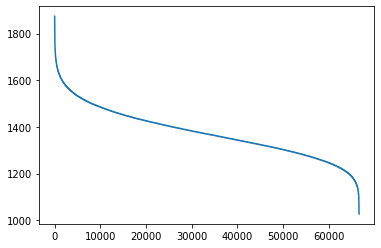

In [374]:
L1.sort(reverse = True)
plt.plot(L1)
plt.show()

### Genetic Algorithm

In [375]:
#poblacion
POPULATION = 100

In [376]:
#crear genoma
def creargen(n,m):
  genome = []
  for i in range(n):
      genome.extend(np.full(m,i))
  np.random.shuffle(genome)  
  return genome


In [377]:
#Algoritmo JSSPA desarollado en clase para correr en genetico
def JSSPGA(cromosoma,n,m,jobs):
  mstart = np.zeros((m), dtype=int)
  jend = np.zeros((n), dtype=int)
  idxs = np.zeros((n), dtype=int)
  makespan = 0
  for e in cromosoma:
      i = idxs[e]
      idxs[e] += 1
      midx = jobs[e, i, 0]
      tim = jobs[e, i, 1]
      #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
      mstart[midx] = max(mstart[midx], jend[e]) + tim
      jend[e] = mstart[midx]
      if mstart[midx] > makespan:
          makespan = mstart[midx]

  return makespan

In [378]:
#Cumplir de forma correcta el JSSP
def funciondevalidacion(cromosomah,n,m):
  cjobs , counts = np.unique(cromosomah, return_counts=True)
  faltantes = []
  for k in range(len(cjobs)):
    for i in range(len(cromosomah)):
      if counts[k] > m:
        for j in range(len(counts)):
          if counts[j] < m:
            faltantes.append(j)
            counts[j]  += 1
            counts[k] -= 1
          if counts[k] == m:
            break
  
  cjobs , counts = np.unique(cromosomah, return_counts=True)

  for k in range(len(cjobs)):
    p = 0
    for i in range(len(cromosomah)):
      if cromosomah[i] == k:
        p += 1
      if p > m:
        y = faltantes[0]
        cromosomah[i] = y
        faltantes.pop(0)
        p -= 1
        

  cjobs , counts = np.unique(cromosomah, return_counts=True)
  print(cjobs,counts)
  print("nuevo")

  return cromosomah, JSSPGA(cromosomah,n,m,jobs)

In [379]:
#herencia y mutaciones
def GA(pa1,pa2,n,m,jobs):

  cromosomah = []
  for i in range(len(pa1)):
    gp1 = pa1[i]
    gp2 = pa2[i]
    prob = random.random()
    if prob < 0.33:
      cromosomah.append(gp1)
    elif prob < 0.66:
      cromosomah.append(gp2)
    else:
      cromosomah.append(randrange(n-1))

  #Cumplir de forma correcta el JSSP
  cjobs , counts = np.unique(cromosomah, return_counts=True)
  if len(cjobs) < n:
    return GA(pa1,pa2,n,m,jobs)
  else: 
    faltantes = []
    for k in range(len(cjobs)):
      for i in range(len(cromosomah)):
        if counts[k] > m:
          for j in range(len(counts)):
            if counts[j] < m:
              faltantes.append(j)
              counts[j]  += 1
              counts[k] -= 1
            if counts[k] == m:
              break

    cjobs , counts = np.unique(cromosomah, return_counts=True)

    for k in range(len(cjobs)):
      p = 0
      for i in range(len(cromosomah)):
        if cromosomah[i] == k:
          p += 1
        if p > m:
          y = faltantes[0]
          cromosomah[i] = y
          faltantes.pop(0)
          p -= 1

    return cromosomah, JSSPGA(cromosomah,n,m,jobs)




In [380]:
#funcion main
def main (n,m,jobs):
  global POPULATION
  generacion = 1
  found = False
  poblacion = []
  makespos = []
  for i in range(POPULATION):
    genoma = creargen(n,m)
    makespos.append(JSSPGA(genoma,n,m,jobs))
    poblacion.append(genoma)
  return genoma, poblacion , makespos


In [381]:
#funcion final

def TesteosGA(jobs,n,m,t):
  global POPULATION
  generacion = 1
  genoma , poblacion, makespos = main(n,m,jobs)
  x = int(len(poblacion) / 2)
  end = time() + t
  listmake0 = []
  index = []
  while time() < end:
    poblacion = [x for _,x in sorted(zip(makespos,poblacion))]  
    makespos.sort()
    nuevagen = []
    nuevagenmake=  []
    s = int((20*POPULATION)/100)
    nuevagen.extend(poblacion[:s])
    nuevagenmake.extend(makespos[:s])
    s = int((80*POPULATION)/100)
    for i in range(s):
        parent1 = parentchoice(poblacion,x)
        parent2 = parentchoice(poblacion,x)
        child , childmake= GA(parent1,parent2, n, m, jobs)
        nuevagen.append(child)
        nuevagenmake.append(childmake)
    poblacion = nuevagen
    makespos = nuevagenmake
    listmake0.append(makespos[0])
  
  return makespos
    








In [382]:
def parentchoice(poblacion,x):
  p = []
  for i in range(len(poblacion)):
    p.append(i)
  parent1 = random.choice(p[:x]) 
  if poblacion[parent1] == None:
    return poblacion[0]
  else:
    return poblacion[parent1]


#Funcion final
TesteosGA ( Numero de tareas, Numero de maquinas, tiempo de ejecución del muestreo aleatorio)


In [383]:
A = TesteosGA(p0,TareasARealizar,Numerodemaquinas,180)

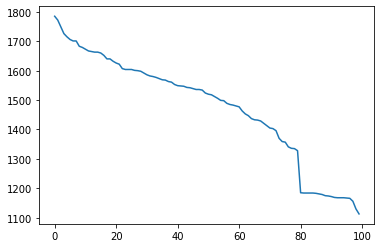

In [384]:
A.sort(reverse = True)
plt.plot(A)
plt.show()

#Comparacion

In [385]:
print("minimo de Genetico:",min(A))
print("minimo de Randomsampling:" , min(L1))

minimo de Genetico: 1113
minimo de Randomsampling: 1027


### TOP 100 debido a las dimensiones

In [386]:
#Eliminar repetidos pues son muchos
L1 = (list(set(L1)))
L1.sort()
TOP80 = L1[:100]
TOP80.sort(reverse = True)

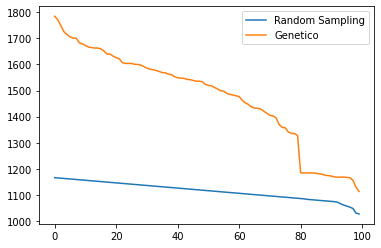

In [387]:
plt.plot(TOP80, )
plt.plot(A, )
plt.legend(['Random Sampling', 'Genetico'])
plt.show()

#La funcion de RANDOMSAMPLING es relativamente mejor, aunque siempre habran errores a corregir, eso seria todo. tambien depende de la suerte al momento de generar. y que tanto cambia la descencia del algoritmo genetico